<h2 style="font-family:camtasia;
          font-size:320%;
          font-weight: bold;
          color: #029db9;
          text-shadow: 2px 2px 2px rgba(0, 0, 0, 0.3);
          text-align:center;
          margin: 0 auto;
          padding:10px; ">
        Trash Type Detection usnig CNN
    </h2>

<div style="max-width: 100%;">
  <img src="https://lepageandsons.com/wp-content/uploads/2021/04/Garbage-Depositphotos_180449132_xl-2015-1210x423.jpg" style="width: 100%; height: auto;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
</div>

<a id="tc"></a>
       
<p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);
          background-size: 40% auto;
          font-family:camtasia;
          font-size:300%;
          font-weight: bold;
          color: #ffffff;
          text-align:center;
          text-shadow: 0px 0px 10px #000000;
          margin: 0 auto;
          border-radius:10px;
          padding:15px;
          box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
        Table of Content
    </p>

<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

* <a href="#import" style="color: #208b9f; text-decoration: none;">Step 1 | Import Libraries</a>
* <a href="#read" style="color: #208b9f; text-decoration: none;">Step 2 | Reading Files</a>
* <a href="#gen" style="color: #208b9f; text-decoration: none;">Step 3 | Generate Data</a>
* <a href="#tt" style="color: #208b9f; text-decoration: none;">Step 4 | Split Train & Test Files</a>
* <a href="#arch" style="color: #208b9f; text-decoration: none;">Step 5 | Network Architecture</a>
* <a href="#compiler" style="color: #208b9f; text-decoration: none;">Step 6 | Compiler</a>
* <a href="#train" style="color: #208b9f; text-decoration: none;">Step 7 | Train Model</a>
* <a href="#evaluate" style="color: #208b9f; text-decoration: none;">Step 8 | Model Evaluation</a>
* <a href="#use" style="color: #208b9f; text-decoration: none;">Step 9 | using Model</a>

<a id="import"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740); background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px; padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 1 | Import Libraries</p>

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.utils as utils
from   tensorflow.keras.preprocessing.image import ImageDataGenerator
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, ZeroPadding2D
from   tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from   tensorflow.keras.utils import plot_model
from   tensorflow.keras.callbacks import ModelCheckpoint
from   pathlib import Path
from   tensorflow.keras import models, layers, optimizers
from   sklearn.utils.class_weight import compute_class_weight


In [2]:
warnings.filterwarnings("ignore")

📄 [Back to Tabel of Contents](#tc)
<a id="read"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 2 | Reading Files</p>

In [33]:
import kagglehub
import os

# Download latest version
data = kagglehub.dataset_download("asdasdasasdas/garbage-classification")

zip_path = 'trashnet/data/dataset-resized.zip'

data_path = '/content/trash_images'
os.makedirs(data_path, exist_ok=True)

#unzipando
!unzip -q {zip_path} -d {data_path}

!ls {data_path}/dataset-resized/.DS

data_path = '/content/trash_images/dataset-resized'

Using Colab cache for faster access to the 'garbage-classification' dataset.
replace /content/trash_images/dataset-resized/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
cardboard  glass  metal  paper	plastic  trash


In [34]:
print(os.listdir(data_path))

['metal', 'trash', 'cardboard', 'plastic', 'paper', '.DS_Store', 'glass']


In [37]:
main_folder_path = Path(data_path)

all_folders = [d for d in main_folder_path.iterdir() if d.is_dir() and not d.name.startswith('.')] #modifiquei para ignorar a pasta '.DS_Store'

# Count number of files in each class
data = []
for folder in all_folders:
    folder_name = folder.name
    file_count = len(list(folder.glob('*.*')))
    if folder_name != data_path:
        data.append({'Folder Name': folder_name, 'File Count': file_count})

count = pd.DataFrame(data)

count = count.set_index('Folder Name')
count

,File Count
Folder Name,
metal,410
trash,137
cardboard,403
plastic,482
paper,594
glass,501


In [38]:
print(f'Total {count.sum()}')

Total File Count    2527
dtype: int64


In [40]:
# Show five image of each class
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(os.path.basename(item_dir))

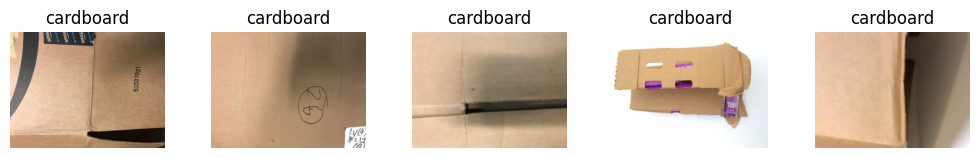

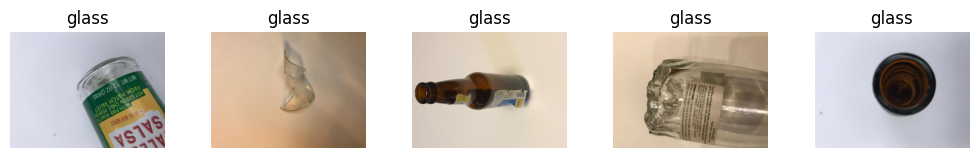

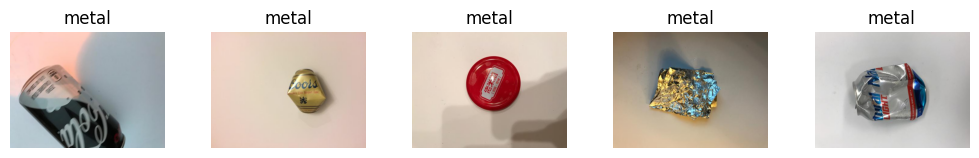

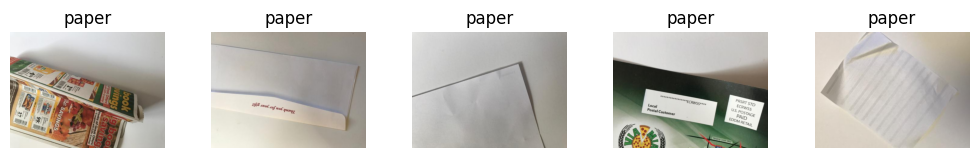

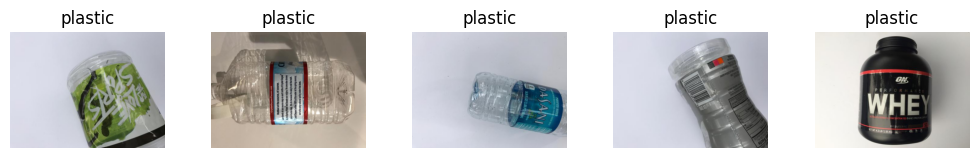

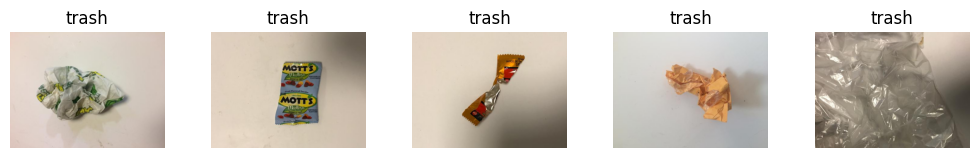

In [41]:
plot_imgs(data_path+'/cardboard')
plot_imgs(data_path+'/glass')
plot_imgs(data_path+'/metal')
plot_imgs(data_path+'/paper')
plot_imgs(data_path+'/plastic')
plot_imgs(data_path+'/trash')

📄 [Back to Tabel of Contents](#tc)
<a id="gen"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 3 | Generate Data</p>

In [42]:
# Define variable for requirements
batch_size = 30
target_size = (180, 180)
validation_split = 0.15

In [43]:
# Data Generators
train_img_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split=validation_split,
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         zoom_range = 0.5,
                                         width_shift_range = 0.3,
                                         height_shift_range = 0.3,
                                         rotation_range=50,
                                         shear_range = 0.3,
                                         fill_mode='nearest'
                                        )

test_data_img_generator = ImageDataGenerator(rescale=1./255,
                                             validation_split=validation_split
                                            )

📄 [Back to Tabel of Contents](#tc)
<a id="tt"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 4 | Split Train & Test Files</p>

In [44]:
# Separate train Data
train_data = train_img_generator.flow_from_directory(data_path,
                                                        subset="training",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 2150 images belonging to 6 classes.


In [45]:
# Separate validation Data
test_data = test_data_img_generator.flow_from_directory(data_path,
                                                        subset="validation",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 377 images belonging to 6 classes.


📄 [Back to Tabel of Contents](#tc)
<a id="arch"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 5 | Network Architecture</p>

In [46]:
model = Sequential()
model.add(ZeroPadding2D(padding=(1, 1), input_shape=(target_size[0], target_size[1], 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

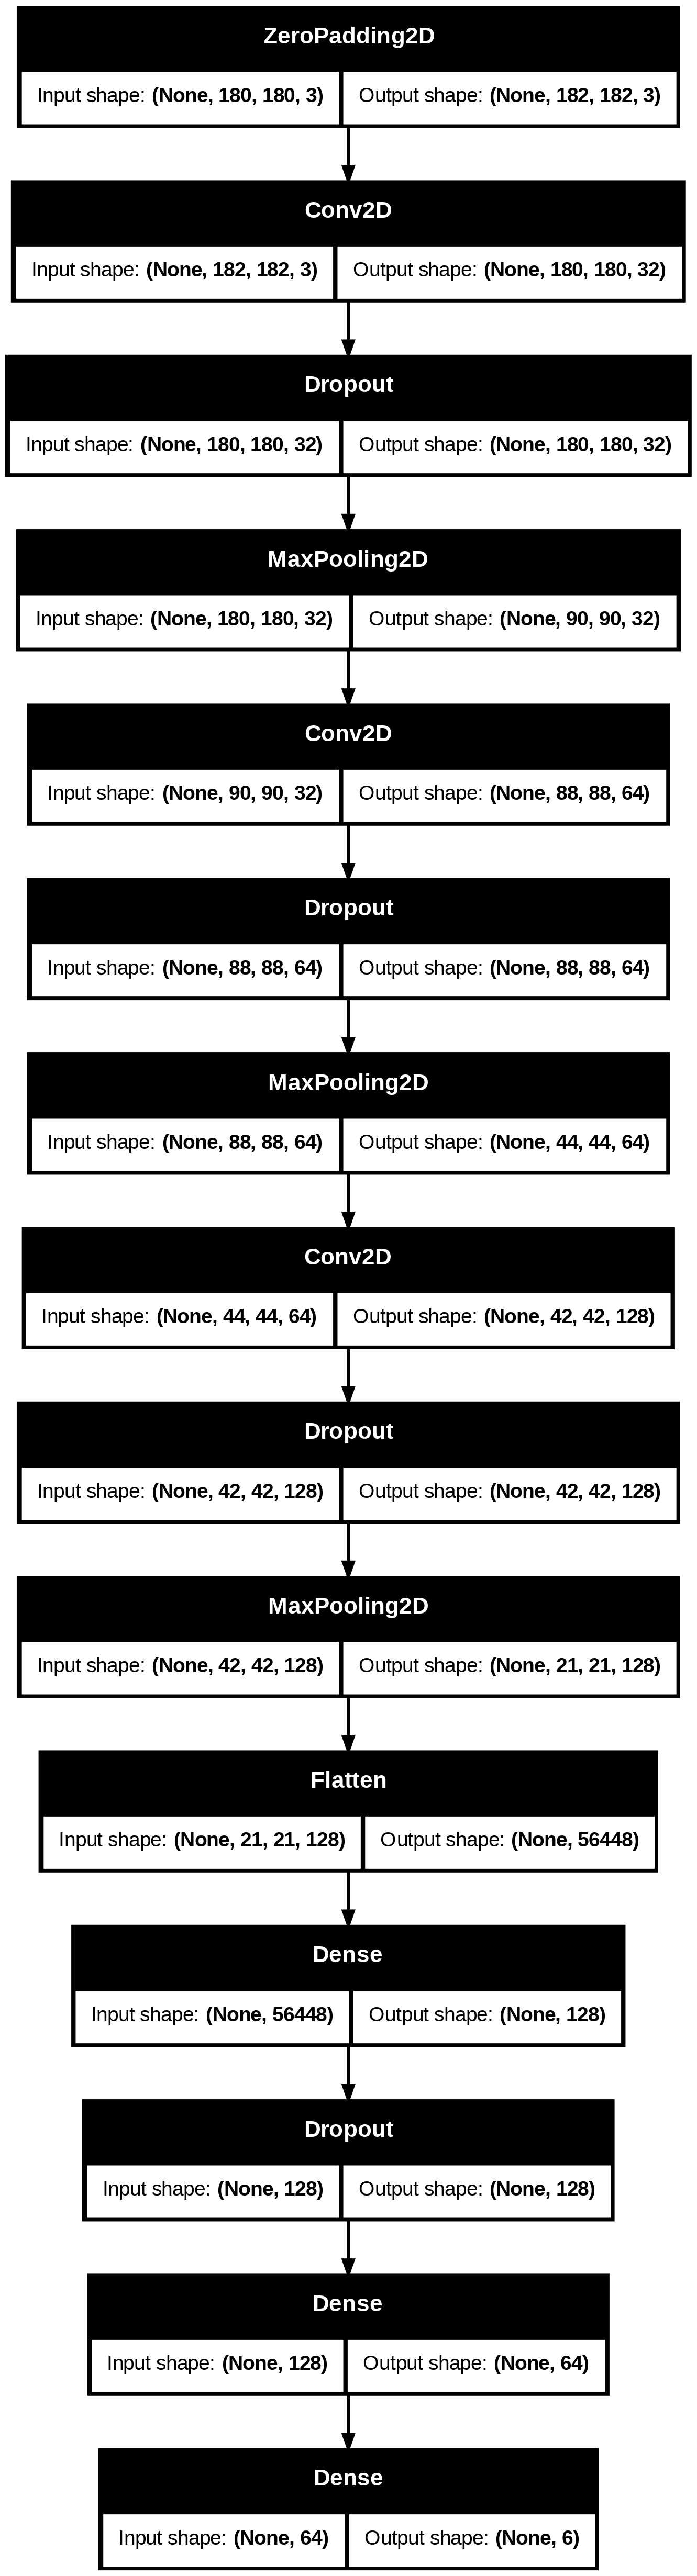

In [47]:
plot_model(model, show_shapes=True, show_layer_names=False)

📄 [Back to Tabel of Contents](#tc)
<a id="compiler"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 6 | Compiler</p>

In [48]:
ES = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [49]:
RLROP = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, min_lr=0.01)

In [50]:
MCH = ModelCheckpoint('trash.h5', monitor='val_loss', mode='min', save_best_only=True)

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

📄 [Back to Tabel of Contents](#tc)
<a id="train"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 7 | Train Model</p>

In [ ]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=500,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks=[ES, RLROP, MCH]
                   )

Epoch 1/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - categorical_accuracy: 0.2078 - loss: 2.2417

72/72 ━━━━━━━━━━━━━━━━━━━━ 37s 390ms/step - categorical_accuracy: 0.2081 - loss: 2.2366 - val_categorical_accuracy: 0.3103 - val_loss: 1.6784 - learning_rate: 0.0010
Epoch 2/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - categorical_accuracy: 0.2975 - loss: 1.6423 - val_categorical_accuracy: 0.2732 - val_loss: 1.7036 - learning_rate: 0.0010
Epoch 3/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - categorical_accuracy: 0.3311 - loss: 1.5616

72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - categorical_accuracy: 0.3314 - loss: 1.5611 - val_categorical_accuracy: 0.3714 - val_loss: 1.5105 - learning_rate: 0.0010
Epoch 4/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - categorical_accuracy: 0.4042 - loss: 1.4919 - val_categorical_accuracy: 0.4430 - val_loss: 1.5596 - learning_rate: 0.0010
Epoch 5/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - categorical_accuracy: 0.4197 - loss: 1.4395 - val_categorical_accuracy: 0.3820 - val_loss: 1.5236 - learning_rate: 0.0010
Epoch 6/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - categorical_accuracy: 0.4414 - loss: 1.3843 - val_categorical_accuracy: 0.3448 - val_loss: 1.5197 - learning_rate: 0.0010
Epoch 7/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - categorical_accuracy: 0.4568 - loss: 1.3519

72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - categorical_accuracy: 0.4568 - loss: 1.3520 - val_categorical_accuracy: 0.3714 - val_loss: 1.4906 - learning_rate: 0.0010
Epoch 8/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - categorical_accuracy: 0.4425 - loss: 1.3734

72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - categorical_accuracy: 0.4427 - loss: 1.3731 - val_categorical_accuracy: 0.4271 - val_loss: 1.4647 - learning_rate: 0.0010
Epoch 9/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 280ms/step - categorical_accuracy: 0.4822 - loss: 1.3029 - val_categorical_accuracy: 0.4032 - val_loss: 1.4689 - learning_rate: 0.0010
Epoch 10/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - categorical_accuracy: 0.4907 - loss: 1.3167 - val_categorical_accuracy: 0.4005 - val_loss: 1.5055 - learning_rate: 0.0010
Epoch 11/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - categorical_accuracy: 0.4652 - loss: 1.3070

72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - categorical_accuracy: 0.4654 - loss: 1.3069 - val_categorical_accuracy: 0.4324 - val_loss: 1.4324 - learning_rate: 0.0010
Epoch 12/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - categorical_accuracy: 0.4977 - loss: 1.2807 - val_categorical_accuracy: 0.3687 - val_loss: 1.5440 - learning_rate: 0.0010
Epoch 13/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - categorical_accuracy: 0.5136 - loss: 1.2585 - val_categorical_accuracy: 0.4509 - val_loss: 1.4572 - learning_rate: 0.0010
Epoch 14/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 283ms/step - categorical_accuracy: 0.4703 - loss: 1.3296 - val_categorical_accuracy: 0.4138 - val_loss: 1.4421 - learning_rate: 0.0010
Epoch 15/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - categorical_accuracy: 0.4987 - loss: 1.2702

72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - categorical_accuracy: 0.4986 - loss: 1.2707 - val_categorical_accuracy: 0.3952 - val_loss: 1.4315 - learning_rate: 0.0010
Epoch 16/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - categorical_accuracy: 0.5295 - loss: 1.2415 - val_categorical_accuracy: 0.4377 - val_loss: 1.4514 - learning_rate: 0.0010
Epoch 17/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - categorical_accuracy: 0.5274 - loss: 1.1911

72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - categorical_accuracy: 0.5273 - loss: 1.1914 - val_categorical_accuracy: 0.4668 - val_loss: 1.4106 - learning_rate: 0.0010
Epoch 18/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - categorical_accuracy: 0.5307 - loss: 1.2153

72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - categorical_accuracy: 0.5306 - loss: 1.2152 - val_categorical_accuracy: 0.4668 - val_loss: 1.3779 - learning_rate: 0.0010
Epoch 19/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - categorical_accuracy: 0.5297 - loss: 1.2296

72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - categorical_accuracy: 0.5297 - loss: 1.2294 - val_categorical_accuracy: 0.4960 - val_loss: 1.3332 - learning_rate: 0.0010
Epoch 20/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 278ms/step - categorical_accuracy: 0.5347 - loss: 1.2132 - val_categorical_accuracy: 0.4695 - val_loss: 1.4066 - learning_rate: 0.0010
Epoch 21/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - categorical_accuracy: 0.5654 - loss: 1.1554 - val_categorical_accuracy: 0.4801 - val_loss: 1.4075 - learning_rate: 0.0010
Epoch 22/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - categorical_accuracy: 0.5805 - loss: 1.1242

72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - categorical_accuracy: 0.5804 - loss: 1.1244 - val_categorical_accuracy: 0.5385 - val_loss: 1.3131 - learning_rate: 0.0010
Epoch 23/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - categorical_accuracy: 0.5981 - loss: 1.0939

72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - categorical_accuracy: 0.5979 - loss: 1.0943 - val_categorical_accuracy: 0.5385 - val_loss: 1.3117 - learning_rate: 0.0010
Epoch 24/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - categorical_accuracy: 0.5644 - loss: 1.1812

72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - categorical_accuracy: 0.5646 - loss: 1.1808 - val_categorical_accuracy: 0.5305 - val_loss: 1.2789 - learning_rate: 0.0010
Epoch 25/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - categorical_accuracy: 0.5756 - loss: 1.0910 - val_categorical_accuracy: 0.5464 - val_loss: 1.3058 - learning_rate: 0.0010
Epoch 26/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - categorical_accuracy: 0.5756 - loss: 1.0657

72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - categorical_accuracy: 0.5757 - loss: 1.0660 - val_categorical_accuracy: 0.5385 - val_loss: 1.2665 - learning_rate: 0.0010
Epoch 27/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - categorical_accuracy: 0.5866 - loss: 1.0731 - val_categorical_accuracy: 0.4775 - val_loss: 1.3607 - learning_rate: 0.0010
Epoch 28/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - categorical_accuracy: 0.5435 - loss: 1.1698 - val_categorical_accuracy: 0.5013 - val_loss: 1.3289 - learning_rate: 0.0010
Epoch 29/500
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - categorical_accuracy: 0.5877 - loss: 1.1031 - val_categorical_accuracy: 0.4987 - val_loss: 1.3134 - learning_rate: 0.0010
Epoch 30/500
19/72 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - categorical_accuracy: 0.5587 - loss: 1.1176

📄 [Back to Tabel of Contents](#tc)
<a id="evaluate"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 8 | Model Evaluation</p>

In [ ]:
best_score = max(history.history['val_categorical_accuracy'] )
print(f"Best Validation score is: {best_score}")

In [ ]:
# Accuracy on train data :
accuracy = history.history['categorical_accuracy']

# Accuracy on test data :
val_accuracy = history.history['val_categorical_accuracy']
epochs = range(1, len(accuracy) + 1)  # Epochs

# Accuracy line plot :
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='test accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

📄 [Back to Tabel of Contents](#tc)
<a id="use"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 9 |  Using Model</p>

In [ ]:
classes = train_data.class_indices
classes

In [ ]:
img = utils.load_img(
    'trash_images/paper/paper_010.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=(180, 180),
    interpolation='nearest',
    keep_aspect_ratio=False
)

img

In [ ]:
img = utils.img_to_array(img)
img = img / 255.0    # Normalize the image

result = model.predict(tf.expand_dims(img, axis=0))

classes = train_data.class_indices

for key, value in classes.items():
    if value == np.argmax(result):
        print(key)

<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

You are welcome to try out the application built on this model :<br>    
    https://github.com/F-Mirfeizi/Trash-Detector